# Differential Coverage-Directed DL Framework Testing Demo

## FYP21-22 SC3


## System Overview

1. Coverage GA

1. Detection GA

1. Localization
    1. Inconsistency Localization
    1. NaN Inconsistency Localization

## 1. Coverage GA

## 2. Detection GA

In [1]:
import os
import cv2
import redis
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from detection_GA.GA_keras import GA, ga_main

Using TensorFlow backend.


In [2]:
import configRedis
configRedis.config()

Configured


In [3]:
# load model

model = keras.models.load_model('external_models/alexnet-cifar10_origin.h5')
new_output = keras.layers.Softmax()(keras.layers.Dense(10, name="dense_3")(model.layers[-2].output)) # without specifying activation 
new_model = keras.models.Model(input=model.input, output=new_output)
new_model.layers[-2].set_weights(model.layers[-1].get_weights())
model = new_model

# model = keras.applications.ResNet50()
# new_output = keras.layers.Softmax()(keras.layers.Dense(1000)(model.layers[-2].output)) # without specifying activation 
# new_model = keras.models.Model(input=model.input, output=new_output)
# new_model.layers[-2].set_weights(model.layers[-1].get_weights())
# model = new_model

# model = keras.applications.MobileNetV2()
# new_output = keras.layers.Softmax()(keras.layers.Dense(1000)(model.layers[-2].output)) # without specifying activation 
# new_model = keras.models.Model(input=model.input, output=new_output)
# new_model.layers[-2].set_weights(model.layers[-1].get_weights())
# model = new_model

# model = keras.applications.VGG16()
# new_output = keras.layers.Softmax()(keras.layers.Dense(1000)(model.layers[-2].output)) # without specifying activation 
# new_model = keras.models.Model(input=model.input, output=new_output)
# new_model.layers[-2].set_weights(model.layers[-1].get_weights())
# model = new_model

/data/yylaiai/anaconda3/envs/audee_test/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/data/yylaiai/anaconda3/envs/audee_test/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("so...)`
  """


In [4]:
# load inputs
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# expand cifar10 images from 32x32 to 224x224
x_test_224 = np.array([cv2.resize(i, (224, 224)) for i in x_test])
print(x_test_224.shape)

(10000, 224, 224, 3)


In [5]:
mut_level = 'i+w'
model = model
x = x_test[0]/255
input_scale = 255 # image scale
init_noise = 0 # scale of Cauchy noise added in initialization
r1 = 0.5 # crossover rate
r2 = 0.3 # mutation rate
r3 = 0.1 # mutation scale (larger scale can trigger NaN inconsistency easier, smaller scale can increase layer distance easier)
m = 3 # top m chromosomes selected
n = 6 # population size
layer_idx = -2 # index of layer used in calculation of fitness values
db_flag = 2
maxIter = 5
dynamicWeightMutDecay = np.inf

r = redis.Redis(db=db_flag)
r.flushdb()

fit = ['inc', ['tensorflow', 'theano']]

In [6]:
ga_inc = GA(fit, mut_level, model, x, input_scale, db_flag)
ga_inc.initPopulation(init_noise, n)
ga_inc.initDynamicWeightMutation(r3)

[[3072, 3072, 0.1],
 [3072, 5760, 0.1],
 [5760, 5760, 0.1],
 [5760, 6144, 0],
 [6144, 620800, 0.1],
 [620800, 620800, 0.1],
 [620800, 621824, 0],
 [621824, 1506944, 0.1],
 [1506944, 2834432, 0.1],
 [2834432, 3719424, 0.1],
 [3719424, 3719424, 0.1],
 [3719424, 3720448, 0],
 [3720448, 3720448, 0.1],
 [3720448, 4773120, 0.1],
 [4773120, 4773120, 0.1],
 [4773120, 21554432, 0.1],
 [21554432, 21554432, 0.1],
 [21554432, 21595402, 0.1],
 [21595402, 21595402, 0.1]]

In [7]:
ga_inc = ga_main(fit, mut_level, model, x, input_scale, init_noise, r1, r2, r3, m, n, layer_idx, db_flag, maxIter, dynamicWeightMutDecay, ga_inc)

Continuing from the previous populations...

Running at iteration 1:
Average fitness value: 170.12336425781248
Time taken: 102.31689882278442

Running at iteration 2:
Average fitness value: 3.63286621339577e+19
Time taken: 101.36361455917358

Running at iteration 3:
Average fitness value: 2.2774815910001333e+21
Time taken: 98.87646913528442

Running at iteration 4:
Average fitness value: 1.976032871780307e+22
Time taken: 98.28308248519897

Running at iteration 5:
Average fitness value: 3.76303026569268e+23
Time taken: 101.69381880760193

Running at iteration 6:
Average fitness value: 1.4042025912103168e+24
Time taken: 102.27084541320801

Running at iteration 7:
Average fitness value: 1.5678057863383035e+25
Time taken: 99.83339619636536

Running at iteration 8:
Average fitness value: 4.926622299376932e+25
Time taken: 102.26488828659058

Running at iteration 9:
Average fitness value: 8.180348670274019e+25
Time taken: 104.95323753356934

Running at iteration 10:
Average fitness value: 3.4

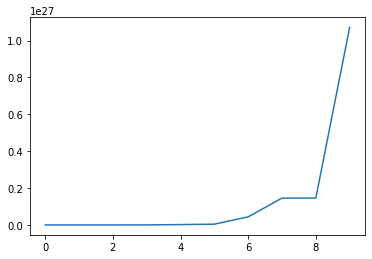

In [9]:
plt.plot(np.max(np.nan_to_num(ga_inc.fit_hist, -1), axis=1))

In [10]:
ga_inc.fit_hist[-1]

array([9.74862389e+25, 9.98086914e+25, 1.45713606e+26, 3.65732910e+26,
       2.64055283e+26, 1.07234199e+27])

In [31]:
mut_level = 'i+w'
model = model
x = x_test[0]/255
input_scale = 255 # image scale
init_noise = 0 # scale of Cauchy noise added in initialization
r1 = 0.5 # crossover rate
r2 = 0.3 # mutation rate
r3 = 20 # mutation scale (larger scale can trigger NaN inconsistency easier, smaller scale can increase layer distance easier)
m = 3 # top m chromosomes selected
n = 6 # population size
layer_idx = -2 # index of layer used in calculation of fitness values
db_flag = 2
maxIter = 10
dynamicWeightMutDecay = np.inf

r = redis.Redis(db=db_flag)
r.flushdb()

fit = ['inc', ['tensorflow', 'theano']]

In [32]:
ga_nan = GA(fit, mut_level, model, x, input_scale, db_flag)
ga_nan.initPopulation(init_noise, n)
ga_nan.initDynamicWeightMutation(r3)

[[3072, 3072, 20],
 [3072, 5760, 20],
 [5760, 5760, 20],
 [5760, 6144, 0],
 [6144, 620800, 20],
 [620800, 620800, 20],
 [620800, 621824, 0],
 [621824, 1506944, 20],
 [1506944, 2834432, 20],
 [2834432, 3719424, 20],
 [3719424, 3719424, 20],
 [3719424, 3720448, 0],
 [3720448, 3720448, 20],
 [3720448, 4773120, 20],
 [4773120, 4773120, 20],
 [4773120, 21554432, 20],
 [21554432, 21554432, 20],
 [21554432, 21595402, 20],
 [21595402, 21595402, 20]]

In [33]:
ga_nan = ga_main(fit, mut_level, model, x, input_scale, init_noise, r1, r2, r3, m, n, layer_idx, db_flag, maxIter, dynamicWeightMutDecay, ga_nan)

Continuing from the previous populations...

Running at iteration 1:
Average fitness value: 170.12336425781248
Time taken: 104.15072274208069

Running at iteration 2:
Average fitness value: nan
Time taken: 98.91877341270447

Running at iteration 3:
Average fitness value: nan
Time taken: 104.75501346588135

Running at iteration 4:
Average fitness value: nan
Time taken: 104.70004725456238

Running at iteration 5:
Average fitness value: nan
Time taken: 105.17480039596558

Running at iteration 6:
Average fitness value: nan
Time taken: 99.77638792991638

Running at iteration 7:
Average fitness value: nan
Time taken: 97.55729293823242

Running at iteration 8:
Average fitness value: nan
Time taken: 105.62516832351685

Running at iteration 9:
Average fitness value: nan
Time taken: 106.11227130889893

Running at iteration 10:
Average fitness value: nan
Time taken: 95.303701877594


Total time taken: 1022.0787642002106


In [35]:
ga_nan.F

[[[['nan', 'tensorflow', [17, 18]], ['nan', 'theano', [17, 18]]],
  array([ 6.19607843e-01,  4.39215686e-01,  1.92156863e-01, ...,
         -3.41296792e-02, -5.36657404e+01, -1.82542689e-02])],
 [[['nan', 'tensorflow', [17, 18]], ['nan', 'theano', [17, 18]]],
  array([ 0.61960784,  0.43921569,  1.        , ..., -0.03412968,
         -0.02668719, -0.01825427])],
 [[['nan', 'tensorflow', [17, 18]], ['nan', 'theano', [17, 18]]],
  array([ 6.19607843e-01,  4.39215686e-01,  1.00000000e+00, ...,
         -3.41296792e-02,  1.83795551e+01, -1.82542689e-02])],
 [[['nan', 'tensorflow', [17, 18]], ['nan', 'theano', [17, 18]]],
  array([ 6.19607843e-01,  4.39215686e-01,  1.92156863e-01, ...,
         -3.41296792e-02, -5.36657404e+01, -1.82542689e-02])],
 [[['nan', 'tensorflow', [17, 18]], ['nan', 'theano', [17, 18]]],
  array([ 6.19607843e-01,  4.39215686e-01,  1.00000000e+00, ...,
         -3.41296792e-02,  1.83795551e+01, -1.82542689e-02])],
 [[['nan', 'tensorflow', [17, 18]], ['nan', 'theano', 

## Localization

In [13]:
# extract model and input from detection GA
def formatP(ga, idx):
    formatted_c = ga.formatPopulations(ga.P)[idx]
    if ga.mut_level == 'i':
        x = formatted_c
    elif ga.mut_level == 'w':
        x = ga.input
        ga.model.set_weights(formatted_c)
    elif ga.mut_level == 'i+w':
        x = formatted_c[0]
        ga.model.set_weights(formatted_c[1])

    return x, ga.model

In [15]:
from localization.inc_localization import IncLocalizer
from localization.nan_localization import NanLocalizer

### Inconsistency Localization

In [20]:
import importlib
import localization.inc_localization
importlib.reload(localization.inc_localization)

from localization.inc_localization import IncLocalizer

In [21]:
from localization.model_configs import get_configs

inc_x, inc_model = formatP(ga_inc, 5)
frameworks = ['tensorflow', 'theano']
model_config = get_configs(inc_model)
model_name = 'alexnet'

incL = IncLocalizer(inc_model, frameworks, inc_x, model_name, model_config, db_flag)

In [38]:
# manually analyze rate of change of inconsistencies between layers

layers_dist = incL.compute_all_layers_dist()

print('Distance of layer between TF and TH:\n')
for i in range(len(model.layers)):
    print('{:<5} {:<30} {}'.format(i, model.layers[i].__class__.__name__, layers_dist[i]))

print()
print('---------------------------------------------------------------')
print()

print('Rate of change of inconsistencies between layers:\n')
for i in range(1,len(model.layers)):
    print('{:<5} {:<30} {}'.format(i, model.layers[i].__class__.__name__, incL.compute_dists_change(i)))

Distance of layer between TF and TH:

0     InputLayer                     0.0
1     Conv2D                         0.025303180019060772
2     MaxPooling2D                   0.021129305164019268
3     BatchNormalization             0.014197592933972677
4     Conv2D                         0.004810093902051449
5     MaxPooling2D                   0.0055399201810359955
6     BatchNormalization             0.005648587312963273
7     Conv2D                         0.001654188252157635
8     Conv2D                         0.001463281335654082
9     Conv2D                         0.0003547866363078356
10    MaxPooling2D                   0.0010434419382363558
11    BatchNormalization             0.0013569925213232636
12    Flatten                        0.0013569925213232636
13    Dense                          0.0015525349881500006
14    Dropout                        0.0015525349881500006
15    Dense                          0.00014380089123733342
16    Dropout                        0.000

In [23]:
print('Distance of layer between TF and TH:\n')
for i in range(len(model.layers)):
    print('{:<5} {:<30} {}'.format(i, model.layers[i].__class__.__name__, layers_dist[i]))

Distance of layer between TF and TH:

0     InputLayer                     0.0
1     Conv2D                         0.004019102081656456
2     MaxPooling2D                   0.0029788166284561157
3     BatchNormalization             0.003173970617353916
4     Conv2D                         0.002450015861541033
5     MaxPooling2D                   0.0013138349685404035
6     BatchNormalization             0.00153858649233977
7     Conv2D                         0.0019705957836574977
8     Conv2D                         0.0006761581257537559
9     Conv2D                         0.00017674024113350443
10    MaxPooling2D                   0.0005101709393784404
11    BatchNormalization             7.358996663242579e-05
12    Flatten                        7.358996663242579e-05
13    Dense                          1.1955818990827538e-05
14    Dropout                        1.1955818990827538e-05
15    Dense                          1.7807902622735128e-05
16    Dropout                        

In [24]:
print('Rate of change of inconsistencies between layers:\n')
for i in range(1,len(model.layers)):
    print('{:<5} {:<30} {}'.format(i, model.layers[i].__class__.__name__, incL.compute_dists_change(i)))

Change rate between layers:

1     Conv2D                         40191.02081656456
2     MaxPooling2D                   -0.258828850121316
3     BatchNormalization             -0.21027344411461665
4     Conv2D                         -0.39039744412869803
5     MaxPooling2D                   -0.6730856170339948
6     BatchNormalization             -0.6171661784904273
7     Conv2D                         -0.509679845994381
8     Conv2D                         -0.8317431888184517
9     Conv2D                         -0.9560011570603529
10    MaxPooling2D                   -0.8730417309178592
11    BatchNormalization             -0.981665523371232
12    Flatten                        -0.981665523371232
13    Dense                          -0.9970004446788455
14    Dropout                        -0.9970004446788455
15    Dense                          -0.9955444134783701
16    Dropout                        -0.9955444134783701
17    Dense                          3.61998455492488
18    Sof

In [25]:
t1 = 3
t2 = 0.1


'''
X: localized inconsistent parameters and layer index
Y: parameters and layer index which cause NaN or crash
M: inconsistent models for replication
'''
X, Y, M = incL.main(t1, t2)

Localizing layer 17: Dense...

Parameter "units" is set to be "300"
Maximizing inconsistency of the input...
New rate of change of 17: 7.448445541877155e+21

Time taken: 166.50839904800523




([],
 [],
 [('Parameter "a": 10 -> a_prime',
   <keras.engine.sequential.Sequential at 0x7fe23c2214a8>)])

### NaN Inconsistency Localization

In [42]:
nanL = NanLocalizer(ga_nan, 'alexnet', 2)

In [43]:
L, _ = nanL.localiseNan()
L

([],
 [[10, 'theano', 16],
  [10, 'theano', 15],
  [11, 'theano', 16],
  [11, 'theano', 15],
  [12, 'theano', 16],
  [12, 'theano', 15],
  [13, 'theano', 16],
  [13, 'theano', 15],
  [14, 'theano', 16],
  [14, 'theano', 15],
  [17, 'theano', 16],
  [17, 'theano', 15],
  [19, 'theano', 16],
  [19, 'theano', 15],
  [20, 'theano', 16],
  [20, 'theano', 15],
  [23, 'theano', 16],
  [23, 'theano', 15],
  [26, 'theano', 16],
  [26, 'theano', 15],
  [27, 'theano', 16],
  [27, 'theano', 15],
  [29, 'theano', 16],
  [29, 'theano', 15],
  [30, 'theano', 16],
  [30, 'theano', 15],
  [31, 'theano', 16],
  [31, 'theano', 17],
  [31, 'theano', 15],
  [33, 'theano', 16],
  [33, 'theano', 15],
  [36, 'theano', 16],
  [36, 'theano', 15]])